***
# Principal Component Analysis (PCA) - Linear

[scikit-learn Doc](http://scikit-learn.org/stable/modules/decomposition.html#pca)

[scikit-learn Parameters](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

* Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.


1901 by Karl Pearson

* Unsupervised Machine Learning

[Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)


* Statistical procedure that utilise [orthogonal transformation](https://en.wikipedia.org/wiki/Orthogonal_transformation) technology

* Convert possible correlated features (predictors) into linearly uncorrelated features (predictors) called **principal components**

* \# of principal components <= number of features (predictors)

* First principal component explains the largest possible variance

* Each subsequent component has the highest variance subject to the restriction that it must be orthogonal to the preceding components. 

* A collection of the components are called vectors.

* Sensitive to scaling


**Note:**

* Used in exploratory data analysis (EDA) 

* Visualize genetic distance and relatedness between populations. 


* Method:

  * Eigenvalue decomposition of a data covariance (or correlation) matrix

  * Singular value decomposition of a data matrix (After mean centering / normalizing ) the data matrix for each attribute.


* Output

  * Component scores, sometimes called **factor scores** (the transformed variable values)
  
  * **loadings** (the weight)

* Data compression and information preservation 

* Visualization

* Noise filtering

* Feature extraction and engineering

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [43]:
rnd_num = np.random.RandomState(42)
X = np.dot(rnd_num.rand(2,2), rnd_num.randn(2, 500)).T

In [44]:
# this is the transformation from x1->x2
rnd_num.rand(2,2)

array([[0.70906052, 0.87096912],
       [0.71408693, 0.80172808]])

In [45]:
rnd_num.randn(2, 500)

array([[ 1.04955272e+00, -5.35235212e-01,  1.31739407e+00,
         1.97599605e-01,  2.07526087e+00, -6.89187818e-01,
         1.73596380e+00,  1.97910783e-01, -6.51418004e-01,
        -4.83885834e-01, -3.20347308e-01,  4.24165946e-01,
         5.22835488e-01, -5.73700004e-01, -2.43545923e-02,
         2.14227036e+00,  1.72754317e+00,  4.36323670e-01,
         3.80034782e-02,  1.20031327e-01,  6.13517973e-01,
        -1.02279257e+00, -2.57376537e-01, -1.66858407e+00,
         3.99223123e-01,  6.47195940e-01, -4.83186462e-01,
         1.57398676e+00, -1.22576566e+00, -1.46437488e+00,
         2.24451819e-01,  1.04709830e+00,  1.68392769e+00,
        -4.58884263e-01,  1.07868083e+00, -3.85084695e-02,
        -1.72627300e-01,  8.83659937e-01,  6.52322878e-01,
        -1.57639216e+00,  1.47654035e+00,  1.38009135e+00,
        -6.25562702e-01,  3.95803533e-01,  4.94030186e-01,
         2.60673766e-01, -5.50305154e-01, -6.71623368e-01,
        -2.55540710e-02,  1.17272902e+00,  5.43600155e-0

In [46]:
rnd_num

RandomState(MT19937) at 0x27F9EE99268

In [47]:
X

array([[-7.06275032e-01, -5.60911546e-01],
       [-5.50810755e-01, -4.63008578e-01],
       [ 2.82811768e-02,  8.01332565e-01],
       [-5.33973291e-01,  4.45221679e-02],
       [-1.29706786e-01, -3.14604522e-01],
       [-5.86785660e-01, -1.00304672e-01],
       [ 8.35586558e-02, -1.77307670e-01],
       [-2.22196567e-01, -3.70986829e-01],
       [-1.36546749e-01,  3.40666414e-02],
       [-1.57943397e+00, -1.94383023e+00],
       [-1.19439569e+00, -1.60791845e+00],
       [ 5.07562007e-01,  4.06303013e-02],
       [ 9.68832484e-02, -4.41507920e-01],
       [-8.11677523e-01, -3.55194597e-01],
       [-2.45654801e-01, -6.05201995e-01],
       [ 1.85390092e-01, -5.83973477e-01],
       [-1.03818322e+00,  7.34423846e-02],
       [ 4.32018026e-01,  1.60020305e-01],
       [-6.04673866e-01, -3.47255098e-01],
       [ 8.85096246e-03, -7.01313307e-01],
       [-9.29534570e-01, -8.55416426e-01],
       [-1.67438227e+00, -9.99313319e-01],
       [-1.97842115e+00, -1.81686241e+00],
       [ 1.

In [48]:
X.shape

(500, 2)

In [49]:
X[:3,0]

array([-0.70627503, -0.55081076,  0.02828118])

In [50]:
X[:3,1]

array([-0.56091155, -0.46300858,  0.80133257])

In [51]:
X[:, 0] = - X[:, 0]

In [52]:
X[:3,0]

array([ 0.70627503,  0.55081076, -0.02828118])

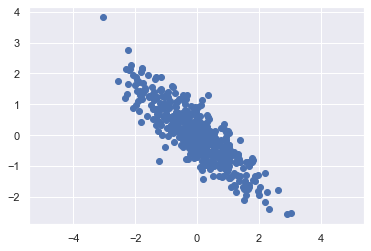

In [53]:
plt.scatter(X[:, 0], X[:, 1]);
plt.axis('equal');

## Principal Components Identification

In [15]:
from sklearn.decomposition import PCA

In [16]:
a = np.array( [ [1,2], [2,4], [3,6] ] )

In [17]:
a

array([[1, 2],
       [2, 4],
       [3, 6]])

In [18]:
pd.DataFrame(a).corr()

,0,1
0,1.0,1.0
1,1.0,1.0


In [19]:
pca = PCA(n_components=2)
pca.fit(a)

PCA(n_components=2)

In [20]:
pca.components_

array([[ 0.4472136 ,  0.89442719],
       [ 0.89442719, -0.4472136 ]])

In [21]:
pca.explained_variance_ratio_

array([1.00000000e+00, 1.80064671e-34])

In [22]:
pca.transform(a)

array([[-2.23606798e+00,  1.11022302e-16],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 2.23606798e+00, -1.11022302e-16]])

In [23]:
np.dot(a, pca.components_.T)

array([[ 2.23606798e+00, -1.11022302e-16],
       [ 4.47213595e+00, -2.22044605e-16],
       [ 6.70820393e+00, -4.44089210e-16]])

In [24]:
np.mean(np.dot(a, pca.components_.T), axis=0)

array([ 4.47213595e+00, -2.59052039e-16])

In [25]:
np.dot(a, pca.components_.T) - np.mean(np.dot(a, pca.components_.T), axis=0)

array([[-2.23606798e+00,  1.48029737e-16],
       [ 0.00000000e+00,  3.70074342e-17],
       [ 2.23606798e+00, -1.85037171e-16]])

In [26]:
pca.singular_values_

array([3.16227766e+00, 4.24340278e-17])

In [54]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [55]:
print(pca.components_)

[[-0.74062812  0.67191517]
 [-0.67191517 -0.74062812]]


In [56]:
print(pca.explained_variance_)

[1.62123504 0.12581594]


In [57]:
print(pca.explained_variance_ratio_)

[0.92798382 0.07201618]


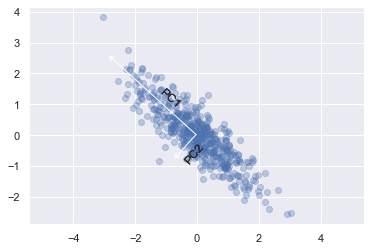

In [58]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)


# plot data

for k, v in zip(pca.explained_variance_, pca.components_):
    vec = v * 3 * np.sqrt(k)
    
    ax = plt.gca()
    arrowprops=dict(arrowstyle='<-',
                    linewidth=1,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', pca.mean_, pca.mean_ + vec, arrowprops=arrowprops)
    ax.text(-0.90, 1.2,'PC1', ha='center', va='center', rotation=-42, size=12)
    ax.text(-0.1,-0.6,'PC2', ha='center', va='center', rotation=50, size=12)
plt.axis('equal');

* Two principal components
* Length denotes the significance 

This transformation from data axes to principal axes is as an affine transformation, which basically means it is composed of a translation, rotation, and uniform scaling.

In [59]:
###########################################
# 0. prove it is scale depended
# 1. think of two vectors/signals that could be orthogonal to each other

In [ ]:
# cos(x) = sin(x+90)

In [266]:
#########################################################

## Dimensionality Reduction with PCA

In [60]:
rnd_num = np.random.RandomState(42)
X = np.dot(rnd_num.rand(2,2), rnd_num.randn(2, 500)).T
X[:, 0] = - X[:, 0]

In [61]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

In [62]:
X.shape

(500, 2)

In [63]:
X_pca.shape

(500, 1)

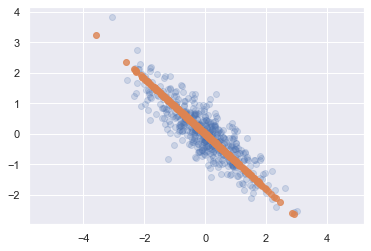

In [64]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2);
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [65]:
X_pca[:10]

array([[-0.93904694],
       [-0.75812324],
       [ 0.52029852],
       [-0.40463534],
       [-0.34652686],
       [-0.54106101],
       [-0.09632464],
       [-0.45291152],
       [-0.11731529],
       [-2.51493704]])

***

In [1]:
####################
# 1. load iris data from seaborn
# 2. investigate shortly the dataframe


In [66]:
df = sns.load_dataset('iris')

In [67]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [69]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


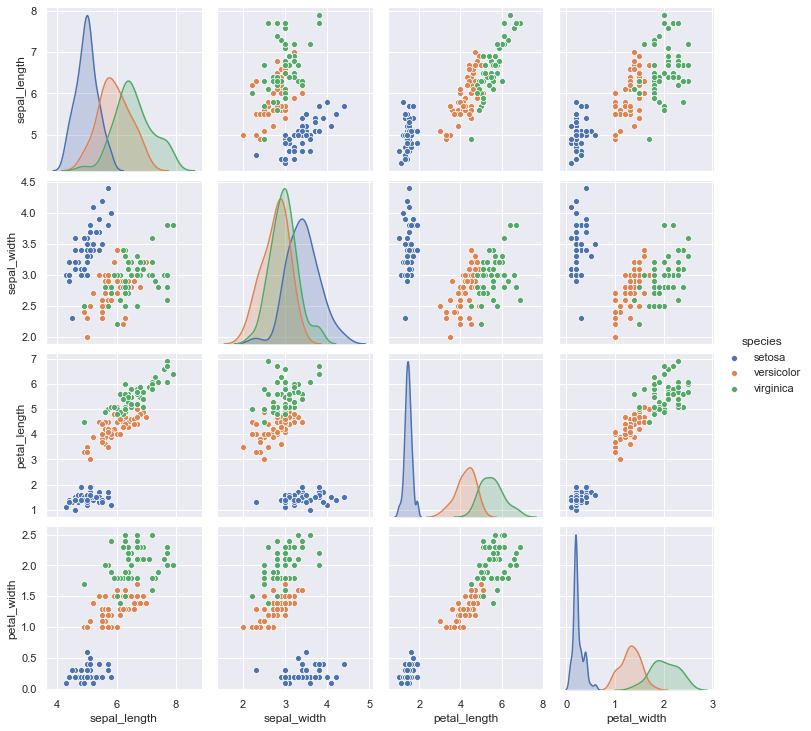

In [71]:
sns.pairplot(df, hue= 'species')

In [72]:
###############################################
# 1. create a NN classifier (MLP) with all the features - max_iter = 1000 iter, rs = 47
# 2. create a standard scaler, scale the data 
# 3. what is the expained variance with 1..4 features? plot cumulative plot
# 4. what is the accuracy with PCA of 1..4 features

In [ ]:
# till 20:35

In [73]:
import sklearn.neural_network as sknn
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['species'], axis=1), 
                                                    df.species, test_size=0.33, 
                                                    random_state=47)

In [95]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
41,4.5,2.3,1.3,0.3
60,5.0,2.0,3.5,1.0
115,6.4,3.2,5.3,2.3
58,6.6,2.9,4.6,1.3
17,5.1,3.5,1.4,0.3


In [96]:
model = sknn.MLPClassifier(max_iter=1000, verbose=False, random_state=47)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [80]:
df2 = df.copy()

In [82]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop(['species'], axis=1), 
                                                    df2.species, test_size=0.33, 
                                                    random_state=47)

In [83]:
X_train.shape

(100, 4)

In [84]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
41,4.5,2.3,1.3,0.3
60,5.0,2.0,3.5,1.0
115,6.4,3.2,5.3,2.3
58,6.6,2.9,4.6,1.3
17,5.1,3.5,1.4,0.3


In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
pca = PCA(n_components=4)
pca.fit(X_train)


PCA(n_components=4)

In [87]:
pca.explained_variance_ratio_

array([0.71953359, 0.23447749, 0.04034972, 0.0056392 ])

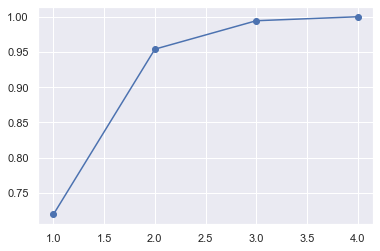

In [88]:
plt.plot(range(1,5), np.cumsum(pca.explained_variance_ratio_), "b-o")

In [103]:
i=2
pca = PCA(0.70)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
model = sknn.MLPClassifier(max_iter=1000, verbose=False, random_state=47)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.92

In [104]:
pca.explained_variance_ratio_

array([0.91963838])

In [91]:
for i in range(1,5):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    model = sknn.MLPClassifier(max_iter=1000, verbose=False, random_state=47)
    model.fit(X_train_pca, y_train)
    s = model.score(X_test_pca, y_test)
    print(f'score for {i} comp = {s} ')

score for 1 comp = 0.94 
score for 2 comp = 0.94 
score for 3 comp = 0.98 
score for 4 comp = 0.98 
